# Regressão Múltipla II

#### Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats

from scipy.stats import f
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols

#### 1. A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperientes de carros, criando uma base de dados dos veículos disponíveis que apresente algumas informações importantes para treinar os novos vendedores. A base de dados foi criada em um documento de texto e contém as seguintes informações:

*   Marca/Modelo/Ano do carro: brand/model/year
*   Capacidade volumétrica (cc) ou volume de deslocamento do motor: cap_vol.
*   Consumo de combustível (km/l): consumo.
*   Potência (cv): power.
*   Peso (kg): weight.
*   0-100 (s), tempo que o carro demora para atingir a velocidade de 100km/h: cemm. 
*   Número de cilindros: nu_cy.
*   Tipo de motor, aspirado (0) ou turbo (1): Etype.
 

Após ter realizado a análise dos dados apresentados, obter o modelo de regressão múltipla, escolha as variáveis adequadas.

In [12]:
#Observar os nomes das variáveis
cars.columns

Index(['brand_model_year', 'cap_vol', 'consumo', 'power', 'weight', 'cemm',
       'nu_cy', 'Etype'],
      dtype='object')

In [13]:
#Observar o tipo de dado de cada coluna
cars.dtypes

brand_model_year     object
cap_vol               int64
consumo             float64
power                 int64
weight                int64
cemm                float64
nu_cy                 int64
Etype                 int64
dtype: object

In [14]:
#Observar os índices
cars.index

RangeIndex(start=0, stop=28, step=1)

In [18]:
# Reduzir a base de dados para usar apenas 
# o motor naturalmente aspirado
dfcars = cars[cars['Etype'] == 0] 
dfcars

,brand_model_year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [26]:
#número de instâncias 
na = dfcars.shape[0]

# número de variáveis
pa = dfcars.shape[1]

na, pa

(14, 8)

In [31]:
#Regressão Primeira opção
#Regressão com a fórmula import statsmodels.formula.api as smf 
regmul = smf.ols('consumo ~ cap_vol + power + weight', data = dfcars) 

#Realizar o processo de modelagem
res = regmul.fit()

#Resultado detalhado
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     23.87
Date:                Wed, 04 May 2022   Prob (F-statistic):           7.08e-05
Time:                        16:06:05   Log-Likelihood:                -19.307
No. Observations:                  14   AIC:                             46.61
Df Residuals:                      10   BIC:                             49.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9363      1.328     10.496      0.0

/home/felipe_oliveira/anaconda3/envs/env_01/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
#cálculo do Fcrit (tabela)
import scipy.stats
F=res.fvalue
k=res.df_model # grau do modelo
n=res.nobs # num. amostras
dfn=k
dfd=n-(k+1)
alpha = 0.1 #nível de confiança.
F_critico=scipy.stats.f.ppf(1-alpha, dfn, dfd)
print("F_crit=",F_critico) #tabela F-dist

#como f-statistic > f_crit, pelo menso um doa parâmetros é diferente de 0

F_crit= 2.8128629971823895


In [36]:
#Fazer um teste para cada parâmetro
#cálculo t_crit (tabela t-student)
from scipy.stats import t
alpha = 0.1  # significia = 5% 
df = 11 # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

#controntar com os valores t da tabela OLS

t_crit=: 1.7958848187036691


In [38]:
#Regressão Segunda opção
regmul2 = smf.ols('consumo ~ cap_vol + power + weight + nu_cy', data = dfcars) 
#Realizar o processo de modelagem
res2 = regmul2.fit()
#Resultado detalhado
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     37.02
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.35e-05
Time:                        16:18:08   Log-Likelihood:                -13.987
No. Observations:                  14   AIC:                             37.97
Df Residuals:                       9   BIC:                             41.17
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8674      1.557     11.475      0.0

/home/felipe_oliveira/anaconda3/envs/env_01/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
#regressão Terceira opção
regmul3 = smf.ols('consumo ~ power + weight + nu_cy', data = dfcars) 
#Realizar o processo de modelagem
res3 = regmul3.fit()
#Resultado detalhado
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     53.63
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.81e-06
Time:                        16:18:57   Log-Likelihood:                -14.134
No. Observations:                  14   AIC:                             36.27
Df Residuals:                      10   BIC:                             38.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8003      1.485     11.983      0.0

/home/felipe_oliveira/anaconda3/envs/env_01/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
res3.params

Intercept    17.800264
power         0.008318
weight       -0.003322
nu_cy        -1.298316
dtype: float64

In [41]:
#gráficos dispersão e resíduos
#Valores previstos e residuos
y_pred=list(res3.predict())
resi=list(res3.resid)

#crear instancia influence
influence = res3.get_influence()

#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)
prop=np.divide(resi,stdresid) #e/e*

In [42]:
y=list(dfcars['consumo'])
dftab = pd.DataFrame(list(zip(y,y_pred,resi,stdresid,prop)), columns =["y","y_p","e","e*","e/e*"])
dftab.head(10)

,y,y_p,e,e*,e/e*
0,12.0,13.318762,-1.318762,-2.556230,0.515901
1,10.4,10.199218,0.200782,0.317628,0.632130
2,12.8,11.285198,1.514802,2.130191,0.711111
3,10.3,9.721191,0.578809,0.823745,0.702655
4,10.5,10.279531,0.220469,0.304188,0.724779
5,8.5,9.064151,-0.564151,-0.776070,0.726933
6,9.5,9.597487,-0.097487,-0.132030,0.738368
7,9.2,9.363190,-0.163190,-0.220734,0.739308
8,6.5,6.973417,-0.473417,-0.698620,0.677645
9,7.1,6.899316,0.200684,0.276749,0.725150


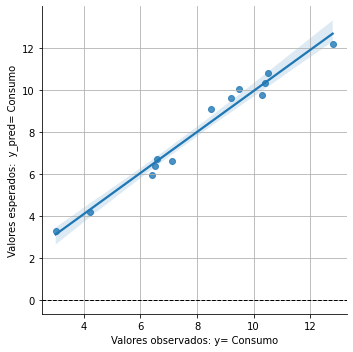

In [22]:
#Gráficos de diagnóstico 2 (y vs. yc)
sns.lmplot(x='y', y='y_p', data=dftab);plt.grid(True)
plt.xlabel('Valores observados: y= Consumo')
plt.ylabel('Valores esperados:  y_pred= Consumo')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

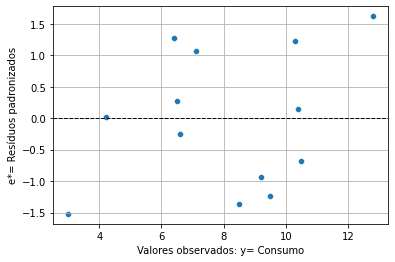

In [23]:
#Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='y', y='e*', data=dftab);plt.grid(True)
plt.xlabel('Valores observados: y= Consumo')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

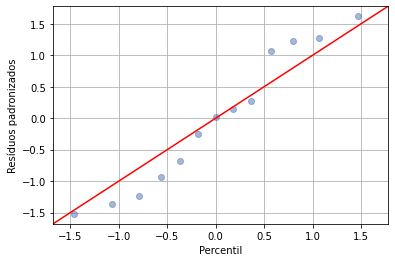

In [24]:
#Gráficos de diagnóstico 4
#Verificar a normalidade dos resíduos
#qqpolot vs. normal distribution 
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')
plt.grid(True)

In [25]:
#Jarque-Bera normality test import statsmodels.api as sm 
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(res3.resid) 
print(JB,JBpv,skw,kurt)

0.9356004195554889 0.6263786554878777 0.08916068550630878 1.6979002335974027


In [26]:
#Analisar amostras influentes
infl = res3.get_influence()
#leverage 
print(infl.hat_matrix_diag)

[0.35806038 0.37861409 0.20088976 0.21422029 0.14468658 0.16700463
 0.13126423 0.33998544 0.16694511 0.23776741 0.32914283 0.46714838
 0.86427087]


In [27]:
#Valores dos resíduos (influencias internas)
#residus = res3.resid.as_matrix() #residuals
leviers = infl.hat_matrix_diag #leverage
sigma_err = np.sqrt(res3.scale) #regression standard error
res_stds = stdresid/(sigma_err*np.sqrt(1.0-leviers))
print(res_stds)

[ 0.35949995  4.20906954  2.79225934 -1.5622264  -3.01478277 -2.7612392
 -2.04154318  0.68753833  2.39848859 -0.59301501  0.05304166  3.59442848
 -8.46147643]


In [28]:
#Limiar 
#threshold leverage
seuil_levier = 2*(pa+1)/na
print(seuil_levier)
#identification
atyp_levier = leviers > seuil_levier
print(atyp_levier)

1.0769230769230769
[False False False False False False False False False False False False
 False]


In [29]:
#Quais carros ultrapassam esse limiar
print(dfcars.index[atyp_levier],leviers[atyp_levier])

Index([], dtype='object', name='brand_model_year') []


In [30]:
#dimensões 
print(dfcars.shape) 
#número de instâncias 
na = dfcars.shape[0] 
# número de variáveis
pa = dfcars.shape[1] - 4
na,pa

(13, 7)


(13, 3)

In [31]:
#valores fornecidos pelo objeto
print(infl.resid_studentized_external)
#verificando com a fórmula
res_studs = res_stds*np.sqrt((na-pa-2)/(na-pa-1-res_stds**2))
print(res_studs)

[ 0.13255651  1.81118385  1.25541191 -0.65337419 -1.43784066 -1.26993869
 -0.91983983  0.25783951  1.07682554 -0.23885329  0.01997201  1.33351375
 -1.66218952]
[ 0.34139992         nan  7.1997264  -1.72526295         nan -6.65900839
 -2.62685161  0.66594194  3.76465014 -0.57035397  0.05001597         nan
         nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


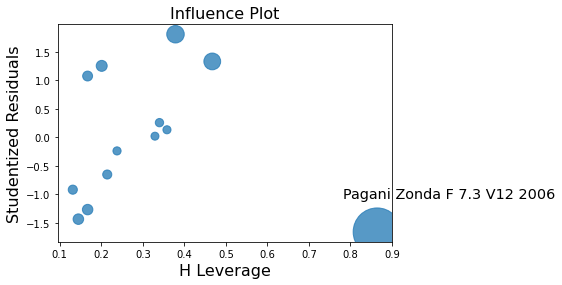

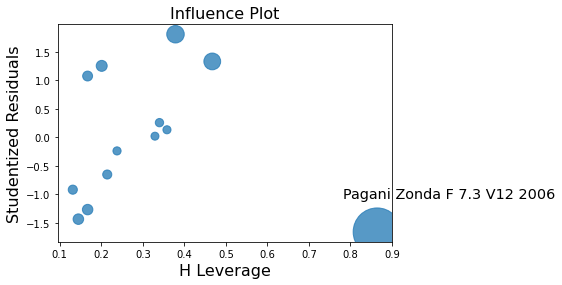

In [32]:
#Representação dos pontos influentes
sm.graphics.influence_plot(res3)

In [33]:
#limiares dos resíduos (influencias externas)
import scipy
seuil_stud = scipy.stats.t.ppf(0.975,df=na-pa-2)
print(seuil_stud)
#detection - absolute value > threshold
atyp_stud = np.abs(res_studs) > seuil_stud
#which ones?
print(dfcars.index[atyp_stud],res_studs[atyp_stud])

2.3060041350333704
Index(['FIAT Strada 1.4 2016', 'Honda Civic EXR 2016',
       'Ford Focus 2.0 GLX 2012', 'AUDI A4 3.2 V6 Fsi 2011'],
      dtype='object', name='brand_model_year') [ 7.1997264  -6.65900839 -2.62685161  3.76465014]


In [34]:
#Observações suspeitas considerando ambos critérios
pbm_infl = np.logical_or(atyp_levier,atyp_stud)
print(dfcars.index[pbm_infl])

Index(['FIAT Strada 1.4 2016', 'Honda Civic EXR 2016',
       'Ford Focus 2.0 GLX 2012', 'AUDI A4 3.2 V6 Fsi 2011'],
      dtype='object', name='brand_model_year')


In [35]:
#Outros critérios para determinar amostras influentes
print(infl.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))

                                   hat_diag  student_resid    dffits   cooks_d
brand_model_year                                                              
FIAT UNO Mille EP 1996             0.358060       0.132557  0.098999  0.002750
Hyundai HB20 Sense 2020            0.378614       1.811184  1.413775  0.398675
FIAT Strada 1.4 2016               0.200890       1.255412  0.629451  0.093093
VolksWagen GOL 1.6 2015            0.214220      -0.653374 -0.341147  0.031074
Chevrolet Cruze LTZ 1.8 2016       0.144687      -1.437841 -0.591374  0.078161
Honda Civic EXR 2016               0.167005      -1.269939 -0.568625  0.075681
Ford Focus 2.0 GLX 2012            0.131264      -0.919840 -0.357554  0.032517
BMW 325i 3.0 2012                  0.339985       0.257840  0.185056  0.009552
AUDI A4 3.2 V6 Fsi 2011            0.166945       1.076826  0.482054  0.057082
Mercedes-Benz CLS 350 3.5 V6 2012  0.237767      -0.238853 -0.133402  0.004970
Mercedes-Benz CLS 500 5.5 V8 2007  0.329143       0.

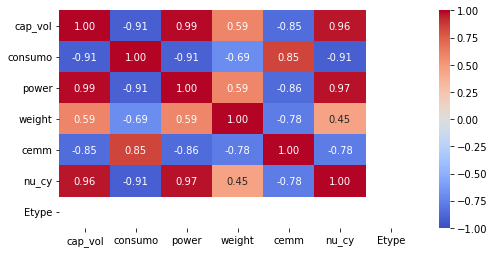

In [51]:
# Calcula a correlação entre os atributos numéricos
corr = dfcars.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [76]:
infl.exog[:,1:4]

array([[  58.,  870.,    4.],
       [  80.,  989.,    3.],
       [  86., 1084.,    4.],
       [ 104.,  961.,    4.],
       [ 144., 1427.,    4.],
       [ 155., 1294.,    4.],
       [ 148., 1347.,    4.],
       [ 218., 1460.,    6.],
       [ 269., 1610.,    6.],
       [ 306., 1735.,    6.],
       [ 388., 1760.,    8.],
       [ 461., 1709.,    8.],
       [ 602., 1230.,   12.]])

In [77]:
#correlation matrix 
import scipy 
mc = scipy.corrcoef(infl.exog[:,1:4], rowvar=0) 
print(mc)

[[1.         0.59225355 0.96890823]
 [0.59225355 1.         0.44569531]
 [0.96890823 0.44569531 1.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
#Klein’s rule of thumb 
mc2 = mc**2 
print(mc2)

[[1.         0.35076427 0.93878317]
 [0.35076427 1.         0.19864431]
 [0.93878317 0.19864431 1.        ]]


In [80]:
#VIF criterion 
vif = np.linalg.inv(mc) 
print(vif)

[[ 34.35864218  -6.87792632 -30.22491181]
 [ -6.87792632   2.62471127   5.49425794]
 [-30.22491181   5.49425794  27.83640092]]


## Extras

In [42]:
#ANOVA
table = sm.stats.anova_lm(res, typ=2) # 
print(table)

             sum_sq   df         F    PR(>F)
cap_vol    0.249945  1.0  0.174047  0.686315
power      0.205274  1.0  0.142941  0.714138
weight     3.079927  1.0  2.144682  0.177102
Residual  12.924689  9.0       NaN       NaN


In [43]:
#estimated coefficients 
print(res.params) 
#R2
print(res.rsquared) 
#calculating the F-statistic 
F = res.mse_model/res.mse_resid 
print(F) 
#F provided by the res object 
print(res.fvalue)

Intercept    13.897284
cap_vol      -0.000544
power        -0.006088
weight       -0.002053
dtype: float64
0.8583177713910948
18.174144629536404
18.174144629536404


### Analisando todas as variáveis do modelo final

In [81]:
dfex = dfcars.drop(columns=["Etype",       # nome
                      "cemm",       # nome
                      "cap_vol"])     # nome
dfex.head()

,consumo,power,weight,nu_cy
brand_model_year,,,,
FIAT UNO Mille EP 1996,10.4,58,870,4
Hyundai HB20 Sense 2020,12.8,80,989,3
FIAT Strada 1.4 2016,10.3,86,1084,4
VolksWagen GOL 1.6 2015,10.5,104,961,4
Chevrolet Cruze LTZ 1.8 2016,8.5,144,1427,4


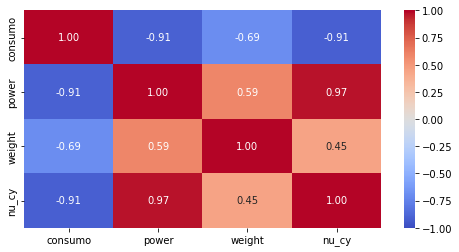

In [82]:
# Calcula a correlação entre os atributos numéricos
corr = dfex.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [89]:
print(corr)

          consumo     power    weight     nu_cy
consumo  1.000000 -0.905766 -0.687542 -0.913702
power   -0.905766  1.000000  0.592254  0.968908
weight  -0.687542  0.592254  1.000000  0.445695
nu_cy   -0.913702  0.968908  0.445695  1.000000


In [83]:
#Klein’s rule of thumb 
mc2 = corr**2 
print(mc2)

          consumo     power    weight     nu_cy
consumo  1.000000  0.820412  0.472714  0.834851
power    0.820412  1.000000  0.350764  0.938783
weight   0.472714  0.350764  1.000000  0.198644
nu_cy    0.834851  0.938783  0.198644  1.000000


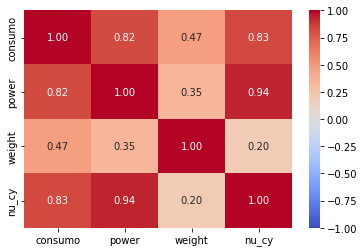

In [87]:
sns.heatmap(mc2, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)

In [92]:
#VIF criterion 
vif = np.linalg.inv(mc2) 
print(vif)

[[  4.94510596   0.86342415  -1.727545    -4.59582941]
 [  0.86342415  11.18956754  -2.18959009 -10.79045883]
 [ -1.727545    -2.18959009   1.96748437   3.10696401]
 [ -4.59582941 -10.79045883   3.10696401  14.34955472]]


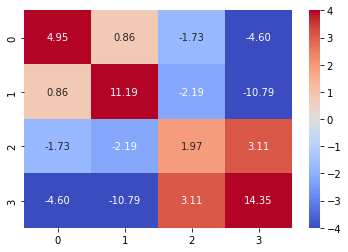

In [93]:
sns.heatmap(vif, cmap='coolwarm', annot=True, fmt=".2f", vmin=-4, vmax=4)

### Analisando apenas as variáveis preditoras do modelo final

In [94]:
dfex1 = dfcars.drop(columns=["Etype",       # nome
                      "cemm",       # nome
                      "consumo",       # nome
                      "cap_vol"])     # nome
dfex1.head()

,power,weight,nu_cy
brand_model_year,,,
FIAT UNO Mille EP 1996,58,870,4
Hyundai HB20 Sense 2020,80,989,3
FIAT Strada 1.4 2016,86,1084,4
VolksWagen GOL 1.6 2015,104,961,4
Chevrolet Cruze LTZ 1.8 2016,144,1427,4


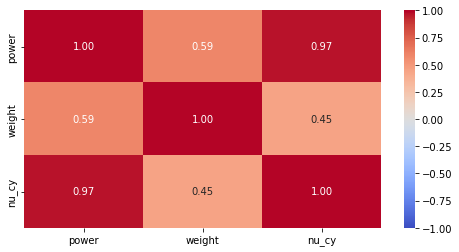

In [96]:
# Calcula a correlação entre os atributos numéricos
corr1 = dfex1.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr1, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [98]:
print(corr1)

           power    weight     nu_cy
power   1.000000  0.592254  0.968908
weight  0.592254  1.000000  0.445695
nu_cy   0.968908  0.445695  1.000000


In [99]:
#Klein’s rule of thumb 
mc21 = corr1**2 
print(mc21)

           power    weight     nu_cy
power   1.000000  0.350764  0.938783
weight  0.350764  1.000000  0.198644
nu_cy   0.938783  0.198644  1.000000


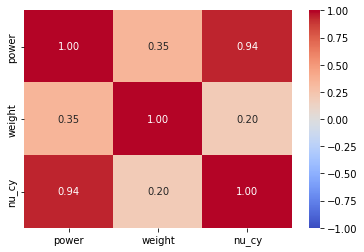

In [101]:
sns.heatmap(mc21, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)

In [103]:
#VIF criterion 
vif1 = np.linalg.inv(mc21) 
print(vif1)

[[11.03881217 -1.88795771 -9.98801898]
 [-1.88795771  1.36397622  1.5014368 ]
 [-9.98801898  1.5014368  10.07833219]]


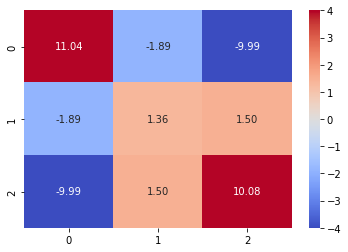

In [105]:
sns.heatmap(vif1, cmap='coolwarm', annot=True, fmt=".2f", vmin=-4, vmax=4)

### Transformação de variáveis



In [2]:
#@title Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf #adicionada na semana 6
import seaborn as sns
import scipy.stats as stats #adicionada na semana 6
from scipy.stats import f #adicionada na semana 6
from statsmodels.graphics.gofplots import ProbPlot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#@title Conjunto de dados original
dx1 = (0.93, 1.11, 0.93, 1.11, 0.93, 1.11, 0.93, 1.11,
       1.02, 1.02, 1.02, 1.02)
dx2 = (1.00, 1.00, 1.00, 1.00, 1.40, 1.40, 1.40, 1.40, 
       1.18, 1.18, 1.18, 1.18)
dx3= (0.20, 0.20, 0.50, 0.50, 0.20, 0.20, 0.50, 0.50,
      0.31, 0.31, 0.31, 0.31)
dy= (32.95, 38.72, 35.20, 38.72, 32.27, 39.71, 33.67, 
     38.72, 35.20, 33.67, 36.02, 32.27)
# Construir o DataFrame e nomear as colunas
dfo = pd.DataFrame(list(zip(dx1, dx2, dx3, dy)),
               columns =["x1","x2","x3","y"])
dfo.head(3)

,x1,x2,x3,y
0,0.93,1.0,0.2,32.95
1,1.11,1.0,0.2,38.72
2,0.93,1.0,0.5,35.20


In [4]:
#@title Conjunto de dados transformado 
lnx1 = np.log(dx1)
lnx2 = np.log(dx2)
lnx3= np.log(dx3)
lny= np.log(dy)
# Construir o DataFrame e nomear as colunas
dft = pd.DataFrame(list(zip(lnx1, lnx2, lnx3, lny)),
               columns =["lnx1","lnx2","lnx3","lny"])
dft.head(4)

,lnx1,lnx2,lnx3,lny
0,-0.072571,0.0,-1.609438,3.494991
1,0.104360,0.0,-1.609438,3.656356
2,-0.072571,0.0,-0.693147,3.561046
3,0.104360,0.0,-0.693147,3.656356


In [5]:
#@title Regressão modelo de múltiplas variáveis
#regressão com a fórmula import statsmodels.formula.api as smf 
regmul = smf.ols('lny ~ lnx1 + lnx2 + lnx3', data = dft) 
#Realizar o processo de modelagem
res = regmul.fit()

In [6]:
#Resultado detalhado
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    lny   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     6.398
Date:                Sun, 10 Apr 2022   Prob (F-statistic):             0.0161
Time:                        01:15:28   Log-Likelihood:                 21.634
No. Observations:                  12   AIC:                            -35.27
Df Residuals:                       8   BIC:                            -33.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5880      0.049     73.095      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [7]:
#@title Cálculo do Fcrit (tabela)
import scipy.stats
F=res.fvalue
k=res.df_model # grau do modelo
n=res.nobs # num. amostras
dfn=k
dfd=n-(k+1)
alpha = 0.05 #nível de confiança.
F_critico=scipy.stats.f.ppf(1-alpha, dfn, dfd)
print("F_crit=",F_critico) #tabela F-dist

F_crit= 4.06618055135116


In [8]:
#@title Alguns comandos importantes
#parâmetros estimados
print(res.params) 
#R2
print(res.rsquared) 
#calculando F-statistic 
F = res.mse_model/res.mse_resid 
print(F) 
#F provided by the res object 
print(res.fvalue)

Intercept    3.587969
lnx1         0.843947
lnx2        -0.027956
lnx3         0.024493
dtype: float64
0.7058127104375433
6.397853661974272
6.397853661974272


In [9]:
#@title Regressão linear simples após aceitar hipótese nula para b2 e b3
#Apenas para verificar refazer a regresão com uma úica variável
#Devido a que os preditores b2 e b3 foram cancelados
#regressão com a fórmula import statsmodels.formula.api as smf 
regmulin = smf.ols('lny ~ lnx1', data = dft) 
#Realizar o processo de modelagem
reslin = regmulin.fit()
#Resultado detalhado
print(reslin.summary())

                            OLS Regression Results                            
Dep. Variable:                    lny   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     22.01
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           0.000853
Time:                        01:15:28   Log-Likelihood:                 21.273
No. Observations:                  12   AIC:                            -38.55
Df Residuals:                      10   BIC:                            -37.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5549      0.013    266.062      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [10]:
#@title Gráficos dispersão e resíduos
#Valores previstos e residuos
y_pred=list(reslin.predict())
resi=reslin.resid
#crear instancia influence
influence = reslin.get_influence()
#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)
prop=np.divide(resi,stdresid) #e/e*

In [11]:
dftab = pd.DataFrame(list(zip(lnx1, lny, y_pred, resi, stdresid, prop)),
               columns =["lnx1","lny","lnyc","e","e*","e/e*"])
dftab

,lnx1,lny,lnyc,e,e*,e/e*
0,-0.072571,3.494991,3.493690,0.001301,0.032553,0.039971
1,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
2,-0.072571,3.561046,3.493690,0.067356,1.685111,0.039971
3,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
4,-0.072571,3.474138,3.493690,-0.019552,-0.489153,0.039971
5,0.104360,3.681603,3.642998,0.038605,0.961341,0.040157
6,-0.072571,3.516607,3.493690,0.022917,0.573341,0.039971
7,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
8,0.019803,3.561046,3.571642,-0.010596,-0.245800,0.043108
9,0.019803,3.516607,3.571642,-0.055035,-1.276683,0.043108


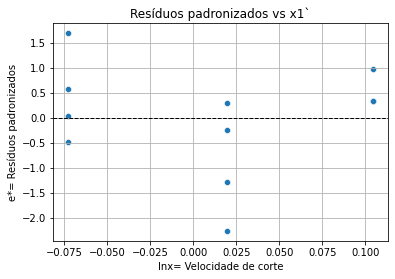

In [12]:
sns.scatterplot(x='lnx1', y='e*', data=dftab);plt.grid(True)
plt.xlabel('lnx= Velocidade de corte')
plt.ylabel('e*= Resíduos padronizados')
plt.title('Resíduos padronizados vs x1`')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

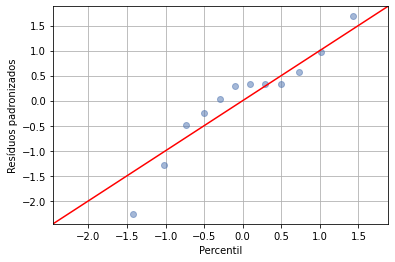

In [13]:
#Verificar a normalidade dos resíduos
#qqpolot vs. normal distribution 
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')
plt.grid(True)


In [14]:
#@title extras 
#ANOVA
table = sm.stats.anova_lm(res, typ=1) # 
print(table)

           df    sum_sq   mean_sq          F    PR(>F)
lnx1      1.0  0.044615  0.044615  18.697041  0.002532
lnx2      1.0  0.000177  0.000177   0.074082  0.792377
lnx3      1.0  0.001008  0.001008   0.422438  0.533937
Residual  8.0  0.019090  0.002386        NaN       NaN


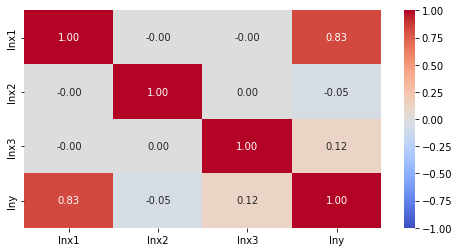

In [23]:
# Calcula a correlação entre as variáveis do modelo
corr = dft.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [34]:
import scipy 
mc = scipy.corrcoef(dft, rowvar=0) 
print(mc)

[[ 1.00000000e+00 -2.38129915e-04 -6.38880596e-04  8.29188751e-01]
 [-2.38129915e-04  1.00000000e+00  2.34035744e-04 -5.23916748e-02]
 [-6.38880596e-04  2.34035744e-04  1.00000000e+00  1.24095443e-01]
 [ 8.29188751e-01 -5.23916748e-02  1.24095443e-01  1.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  


In [35]:
#Klein’s rule of thumb 
mc2 = mc**2 
print(mc2)

[[1.00000000e+00 5.67058563e-08 4.08168416e-07 6.87553984e-01]
 [5.67058563e-08 1.00000000e+00 5.47727297e-08 2.74488759e-03]
 [4.08168416e-07 5.47727297e-08 1.00000000e+00 1.53996790e-02]
 [6.87553984e-01 2.74488759e-03 1.53996790e-02 1.00000000e+00]]


In [36]:
#VIF criterion 
vif = np.linalg.inv(mc) 
print(vif)

[[ 3.3375094  -0.14696941  0.35196724 -2.81880276]
 [-0.14696941  1.00927067 -0.02235921  0.17751744]
 [ 0.35196724 -0.02235921  1.05280525 -0.42366705]
 [-2.81880276  0.17751744 -0.42366705  3.39919512]]


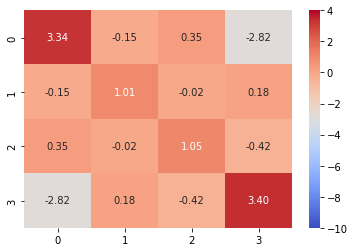

In [38]:
#Gráfico do VIF, um critério indicador de multicolinearidade é considerar VIF>4
sns.heatmap(vif, cmap='coolwarm', annot=True, fmt=".2f", vmin=-10, vmax=4)

### Modelo logístico

In [27]:
#@title Definir os dados
lstx1 = (1.80, 1.65, 2.70, 3.67, 1.41, 1.76, 2.10, 2.10, 4.57, 3.59,
         8.33, 2.86, 2.58, 2.90, 3.89, 0.80, 0.60, 1.30, 0.83, 0.57, 
         1.44, 2.08, 1.50, 1.38, 0.94, 1.58, 1.67, 3.00, 2.21)
lstx2 = (2.40, 2.54, 0.84, 1.68, 2.41, 1.93, 1.77, 1.50, 2.43, 5.55,
         5.58, 2.00, 3.68, 1.13, 2.49, 1.37, 1.27, 0.87, 0.97, 0.94, 
         1.00, 0.78, 1.03, 0.82, 1.30, 0.83, 1.05, 1.19, 0.86)
lsty= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(lstx1, lstx2,lsty)),
               columns =["x1","x2","y"])
x=df[['x1','x2']]
y=df['y']
df.head(3)

,x1,x2,y
0,1.80,2.40,1
1,1.65,2.54,1
2,2.70,0.84,1


In [17]:
#@title Regressão logística
#adicionar uma constante preditora
x = sm.add_constant(x)
# Construir o modelo e ajustar os dados 
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.151888
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   29
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.7807
Time:                        01:15:29   Log-Likelihood:                -4.4048
converged:                       True   LL-Null:                       -20.084
Covariance Type:            nonrobust   LLR p-value:                 1.551e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1457      5.184     -2.536      0.011     -23.306      -2.985
x1             2.7740      1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
model.params

const   -13.145657
x1        2.774021
x2        5.668211
dtype: float64

In [19]:
#@title Razão das chances
# ... Define and fit model
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
print(odds_ratios)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

              OR   Lower CI   Upper CI
const -13.145657 -23.306390  -2.984923
x1      2.774021  -0.121639   5.669680
x2      5.668211   0.489678  10.846743
               OR      Lower CI      Upper CI
const    0.000002  7.553761e-11      0.050543
x1      16.022926  8.854677e-01    289.941871
x2     289.516064  1.631791e+00  51366.594509


In [20]:
#@title Valores previstos vs. observados
# performing predictions on the test datdaset
yhat = model.predict()
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y
print('Valores observados:', list(y))
print('Valores previstos:', prediction)
df2 = pd.DataFrame(list(zip(y, prediction)),
               columns =["x","y"])
#df2.to_csv(index=False)

Valores observados: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Valores previstos: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [21]:
#@title Acurácia do modelo
from sklearn.metrics import (confusion_matrix,accuracy_score)
 
# confusion matrix
cm = confusion_matrix(y, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, prediction))

Confusion Matrix : 
 [[13  1]
 [ 1 14]]
Test accuracy =  0.9310344827586207


In [22]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.05  # significia = 5% 
df = 11 # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

t_crit=: 2.200985160082949


## Extras

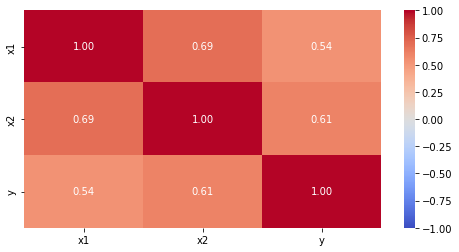

In [48]:
# Calcula a correlação entre as variáveis do modelo
corr = df.corr()
# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [49]:
import scipy 
mclo = scipy.corrcoef(df, rowvar=0) 
print(mclo)

[[1.         0.68809573 0.53836676]
 [0.68809573 1.         0.60809228]
 [0.53836676 0.60809228 1.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  


In [50]:
#Klein’s rule of thumb 
mc2lo = mc**2 
print(mc2lo)

[[1.         0.47347574 0.28983876]
 [0.47347574 1.         0.36977622]
 [0.28983876 0.36977622 1.        ]]


In [51]:
#VIF criterion 
viflo = np.linalg.inv(mc) 
print(viflo)

[[ 1.98531787 -1.13632971 -0.37783582]
 [-1.13632971  2.23713518 -0.74862249]
 [-0.37783582 -0.74862249  1.6586458 ]]


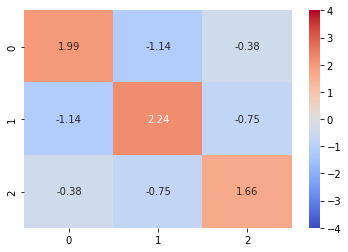

In [53]:
sns.heatmap(viflo, cmap='coolwarm', annot=True, fmt=".2f", vmin=-4, vmax=4)